# Latihan Membuat Model Untuk Memprediksi Dataset Chessman

### Unduh Dataset :

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip \
-O /tmp/Chessman-image-dataset.zip

--2021-07-17 16:39:03--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M  11.5MB/s    in 6.5s    

2021-07-17 16:39:11 (8.94 MB/s) - ‘/tmp/Chessman-image-dataset.zip’ saved [60684125/60684125]



### Ektrak Dataset

melakukan ekstraksi terhadap dataset yang kita unduh karena dataset dalam bentuk file zip.

In [ ]:
    import os
    import zipfile
    local_zip = '/tmp/Chessman-image-dataset.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('/tmp')
    zip_ref.close()

Gunakan fungsi listdir dari kelas os untuk melihat direktori yang terdapat pada dataset. Dapat kita lihat bahwa terdapat 6 buah direktori pada dataset. Setiap direktori berisi gambar pion catur sesua dengan nama direktorinya

In [ ]:
    os.listdir('/tmp/Chessman-image-dataset/Chess')

['Pawn', 'Rook', 'King', 'Knight', 'Bishop', 'Queen']

Selanjutnya kita perlu melihat berapa banyak gambar pada setiap direktori. Dari output dapat dilihat bahwa jumlah sampel pada tiap direktori berbeda. Perlu diperhatikan juga dataset ini berukuran sangat kecil sehingga performa dari model mungkin tidak akan terlalu baik. Kita akan mencoba menggunakan augmentasi gambar untuk mengatasi masalah ini.

In [ ]:
    print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
    print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
    print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

total pawn images : 107
total King images : 76
total Knight images : 106


Kita dapat melihat contoh dari sebuah gambar pada dataset dengan menjalankan kode di bawah

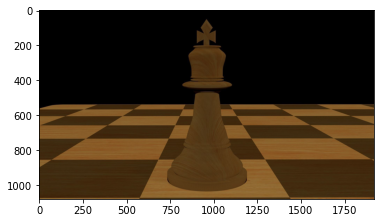

In [ ]:
    from keras.preprocessing import image
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    %matplotlib inline
    img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
    imgplot = plt.imshow(img)

### Image Data Generator

Selanjutnya kita impor ImageDataGenerator dan aplikasikan augmentasi gambar pada dataset kita. Perhatikan bahwa ada parameter yaitu validation split

In [ ]:
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
     
     
    train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
    train_datagen = ImageDataGenerator(rescale=1./255,
        rotation_range=20,
        zoom_range=0.2,
        shear_range=0.2,
        fill_mode = 'nearest',
        validation_split=0.1) # set validation split

Dataset yang kita miliki hanya terdiri dari 1 buah direktori dan tidak terbagi menjadi direktori training dan testing. Tapi tenang, dengan ImageDataGenerator kita tidak perlu susah payah membagi direktori secara manual, cukup dengan menggunakan parameter validation_split. Dengan parameter tersebut, kita hanya cukup memberi tahu ImageDataGenerator mana data untuk training dan mana data untuk testing dengan menambahkan parameter subset dengan nilai training atau validation.

In [ ]:
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=8,
        class_mode='categorical',
        subset='training') # set as training data
    validation_generator = train_datagen.flow_from_directory(
        train_dir, # same directory as training data
        target_size=(150, 150),
        batch_size=16,
        class_mode='categorical',
        subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


### Arsitektur Model Sequential

Selanjutnya, kita buat arsitektur dari model kita. Untuk model ini kita menggunakan 3 lapis convolution dan 2 hidden layer dengan 512 dan 256 buah unit perseptron.

In [ ]:
    import tensorflow as tf
    model = tf.keras.models.Sequential([
        # Note the input shape is the desired size of the image 150x150 with 3 bytes color
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.4),  
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.4),  
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(), 
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
        tf.keras.layers.Dense(6, activation='softmax')  
    ])

### Optimizer dan Loss

Setelah arsitektur dibuat, tentukan optimizer dan loss yang akan digunakan mo

In [ ]:
    model.compile(optimizer=tf.optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])

### Melatih Model

Terakhir, panggil fungsi fit untuk melatih model kita.

In [ ]:
    history = model.fit(train_generator,
                                  validation_data=validation_generator,
                                  epochs=50,
                                  batch_size=128,
                                  verbose=2)

Epoch 1/50
63/63 - 41s - loss: 1.8735 - accuracy: 0.1523 - val_loss: 1.7849 - val_accuracy: 0.1923
Epoch 2/50
63/63 - 9s - loss: 1.7879 - accuracy: 0.1824 - val_loss: 1.7811 - val_accuracy: 0.1923
Epoch 3/50
63/63 - 10s - loss: 1.7817 - accuracy: 0.1904 - val_loss: 1.7727 - val_accuracy: 0.1923
Epoch 4/50
63/63 - 10s - loss: 1.7820 - accuracy: 0.2144 - val_loss: 1.7800 - val_accuracy: 0.1731
Epoch 5/50
63/63 - 9s - loss: 1.7545 - accuracy: 0.2265 - val_loss: 1.7698 - val_accuracy: 0.2115
Epoch 6/50
63/63 - 9s - loss: 1.7279 - accuracy: 0.2766 - val_loss: 1.6991 - val_accuracy: 0.3077
Epoch 7/50
63/63 - 9s - loss: 1.6855 - accuracy: 0.2866 - val_loss: 1.6760 - val_accuracy: 0.3269
Epoch 8/50
63/63 - 9s - loss: 1.5575 - accuracy: 0.3527 - val_loss: 1.6840 - val_accuracy: 0.3462
Epoch 9/50
63/63 - 9s - loss: 1.6182 - accuracy: 0.3447 - val_loss: 1.7017 - val_accuracy: 0.2692
Epoch 10/50
63/63 - 10s - loss: 1.4970 - accuracy: 0.4008 - val_loss: 1.5814 - val_accuracy: 0.3462
Epoch 11/50
63/

### Membuat Plot Akurasi dan Loss

Anda juga dapat membuat plot akurasi dari model

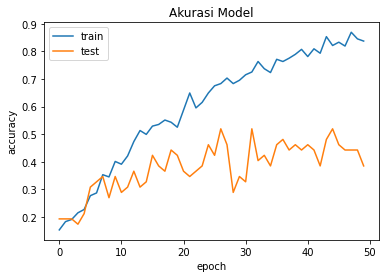

In [ ]:
    import matplotlib.pyplot as plt
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Akurasi Model')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Untuk membuat plot loss Anda cukup menjalankan kode berikut.

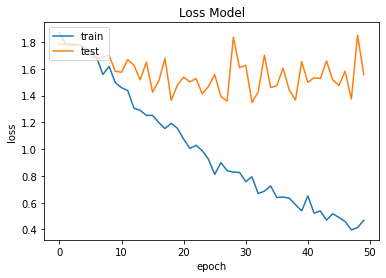

In [ ]:
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss Model')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Kita sudah berhasil mengembangkan model untuk mengklasifikasikan dataset yang sangat variatif. Akurasi yang didapat sekitar 50% di mana model akan membuat sekitar 50 persen prediksi yang salah. 

# Transfer Learning

disini kita mulai mengimplementasikan transfer learning. Untuk model yang kita pilih sebagai model dasar transfer learning adalah ResNet152V2. Model ResNet152V2 memiliki sebanyak 152 layer dan tersedia di library keras. Kita dapat memanfaatkan fitur-fitur yang telah dipelajari oleh model tersebut untuk dipakai model kita. 

Untuk mengimplementasikan transfer learning sangatlah mudah seperti kode di bawah. Kita hanya perlu menambahkan 2 buah baris kode berbeda. Layer pertama pada model kita adalah model yang kita pakai untuk transfer learning. Kita cukup memanggil kelas ResNet152V2 dan mengisi parameter sebagai berikut:

    Weight : ini adalah bobot atau parameter seperti yang telah dibahas pada kelas machine learning pemula. Untuk parameter weight kita mengisi nilai ‘imagenet’. Artinya kita ingin menggunakan model ResNet152V2 yang telah dilatih pada dataset imagenet. Imagenet adalah sebuah database raksasa yang berisi lebih dari 14 juta gambar.
    Include_top : parameter ini bernilai boolean. Maksud dari parameter ini apabila kita ingin tetap memakai layer terakhir/layer prediksi dari model resnet. Kita isi false karena kita memakai model resnet untuk memprediksi dataset chessman bukan imagenet.
    Input_tensor : sesuai namanya parameter ini menspesifikasikan ukuran dari input.

In [ ]:
    import tensorflow as tf
    from tensorflow.keras.layers import Input
    from tensorflow.keras.applications import ResNet50
    from tensorflow.keras.applications import ResNet152V2
    model = tf.keras.models.Sequential([
        ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
        # tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Flatten(), 
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(6, activation='softmax')  
    ])
    model.layers[0].trainable = False

234553344/234545216 [==============================] - 2s 0us/step


Lanjutkan dengan menentukan optimizer, loss, serta metrik yang ingin digunakan pada model.

In [ ]:
    model.compile(optimizer=tf.optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])

Terakhir kita dapat melakukan pelatihan model. 

In [ ]:
    history = model.fit(train_generator,
                                  validation_data=validation_generator,
                                  epochs=50,
                                  batch_size=128,
                                  verbose=2)

Epoch 1/50
63/63 - 102s - loss: 8.1700 - accuracy: 0.4509 - val_loss: 1.3381 - val_accuracy: 0.6346
Epoch 2/50
63/63 - 91s - loss: 1.9755 - accuracy: 0.6613 - val_loss: 1.0444 - val_accuracy: 0.7115
Epoch 3/50
63/63 - 92s - loss: 1.5305 - accuracy: 0.7074 - val_loss: 1.6298 - val_accuracy: 0.7308
Epoch 4/50
63/63 - 91s - loss: 1.6295 - accuracy: 0.7134 - val_loss: 1.2373 - val_accuracy: 0.6538
Epoch 5/50
63/63 - 90s - loss: 0.7213 - accuracy: 0.8036 - val_loss: 1.2074 - val_accuracy: 0.7308
Epoch 6/50
63/63 - 90s - loss: 0.7294 - accuracy: 0.8116 - val_loss: 1.6492 - val_accuracy: 0.6538
Epoch 7/50
63/63 - 90s - loss: 0.5675 - accuracy: 0.8798 - val_loss: 0.7785 - val_accuracy: 0.7885
Epoch 8/50
63/63 - 90s - loss: 0.3568 - accuracy: 0.8918 - val_loss: 0.6000 - val_accuracy: 0.7885
Epoch 9/50
63/63 - 90s - loss: 0.4381 - accuracy: 0.9058 - val_loss: 1.4620 - val_accuracy: 0.7692
Epoch 10/50
63/63 - 90s - loss: 0.4804 - accuracy: 0.8818 - val_loss: 1.4318 - val_accuracy: 0.7308
Epoch 11

Dengan menggunakan transfer learning prediksi model kita menjadi lebih baik tanpa harus melatih model dari awal sekali untuk mengenali fitur-fitur pada gambar.